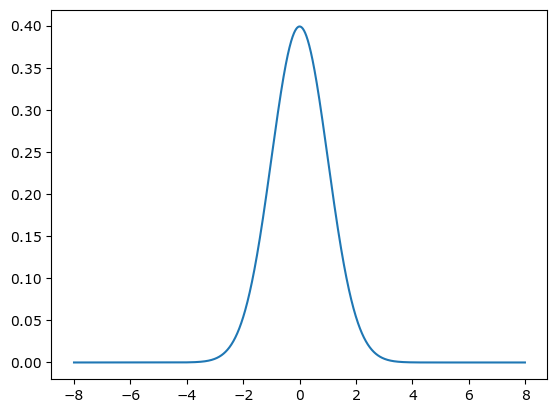

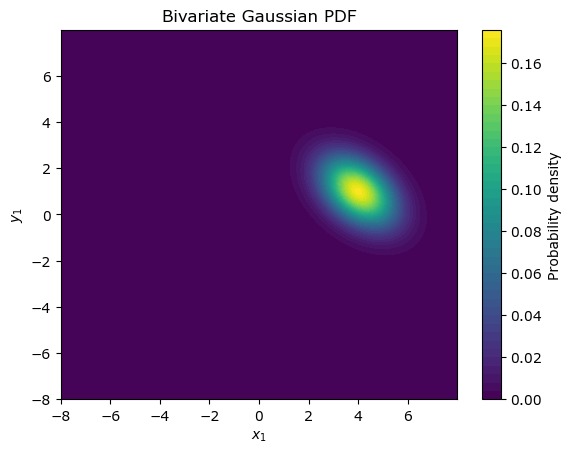

In [1]:
# 1(a)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x_axis = np.arange(-8, 8, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

# 1(b)
from scipy.stats import multivariate_normal as m_normal

x1 = np.arange(-8, 8, 0.01)
x2 = np.arange(-8, 8, 0.01)
mean = [4,1]
sigma = np.array([[1,-0.4],[-0.4,1]])
x_1,x_2 = np.meshgrid(x1,x2)
grid = np.dstack([x_1,x_2])
pdf_values = m_normal(mean, sigma).pdf(grid)
plt.contourf(x_1, x_2, pdf_values, levels=50, cmap="viridis")
plt.colorbar(label="Probability density")
plt.title("Bivariate Gaussian PDF")
plt.xlabel("$x_1$")
plt.ylabel("$y_1$")
plt.show()

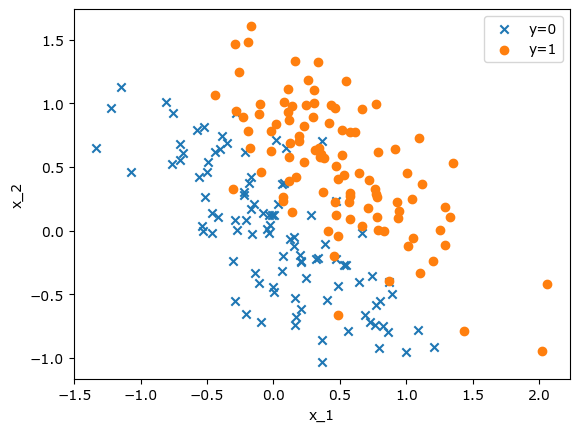

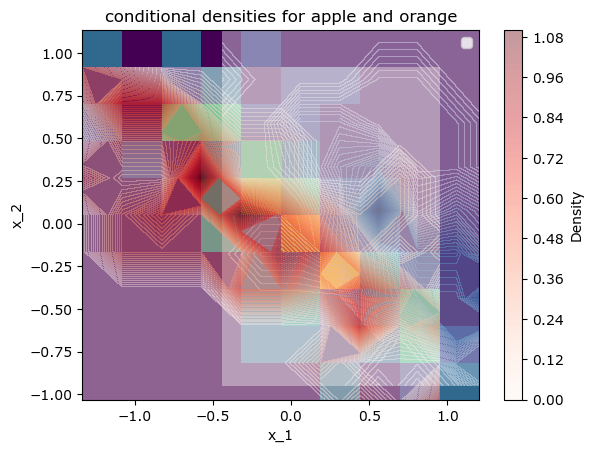

In [2]:
# 2 (a)
import pandas as pd

appleOrange = pd.read_csv('applesOranges.csv') # 200rows x 3columns
appleOrange = appleOrange.rename(columns=({'x.1':'x_1', 'x.2':'x_2'}))

# (b)
# scatter plot based on the y values
marker_map = {0: 'x', 1: 'o'}

groups = appleOrange.groupby('y')
for y_value, group in groups:
    plt.scatter(group.x_1, group.x_2, marker=marker_map[y_value], label=f'y={y_value}')
legend = plt.legend()
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

# (c)
# 2D histogram based on the y values
apple = appleOrange[appleOrange['y']==1]
orange = appleOrange[appleOrange['y']==0]

counts_a, xedges_a, yedges_a, image_a = plt.hist2d(apple['x_1'], apple['x_2'], bins=10, density=True)
counts_o, xedges_o, yedges_o, image_o = plt.hist2d(orange['x_1'], orange['x_2'], bins=10, density=True)
xgrid_a, ygrid_a = np.meshgrid(xedges_a[:-1], yedges_a[:-1], indexing='ij')
xgrid_o, ygrid_o = np.meshgrid(xedges_o[:-1], yedges_o[:-1], indexing='ij')
plt.contourf(xgrid_a, ygrid_a, counts_a.T, levels=60, cmap='Blues', alpha=0.4)
plt.contourf(xgrid_o, ygrid_o, counts_o.T, levels=60, cmap='Reds', alpha=0.4)

plt.colorbar(label='Density')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('conditional densities for apple and orange')
plt.legend(['Apples (y=1)', 'Oranges (y=0)'], loc='upper right')
plt.show()

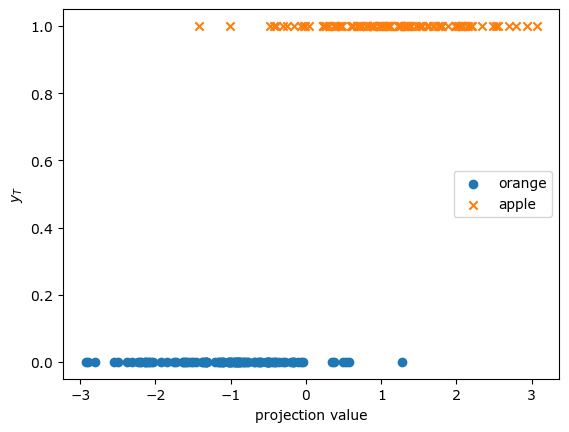

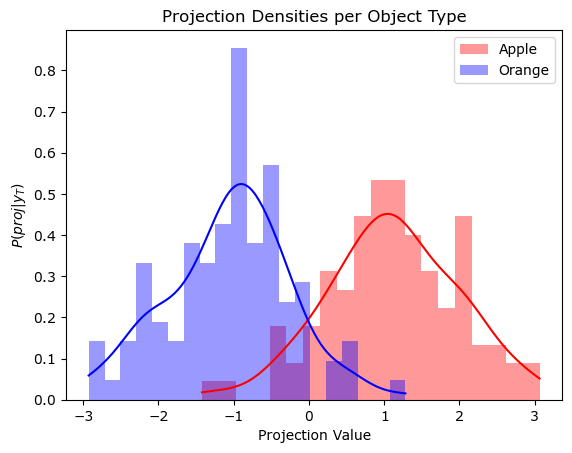

In [3]:
# 3
import pandas as pd
import numpy as np

# (a)
df = pd.read_csv('applesOranges.csv')
df = df.rename(columns=({'x.1':'x_1', 'x.2':'x_2'}))
X = df[['x_1', 'x_2']].transpose()
y = df['y']

# (b)
v = np.ones(X.shape[1]).reshape(1, -1)

# (c)
X_prime = np.vstack([v, X])

# (d)
w = np.array([[-1.05, 2.183, 2.17]])
projection1 = np.dot(w, X_prime)

projection2 = np.array([])
for i in range(len(X_prime[0])):
    z = 0
    for j in range(len(X_prime)):
        z += w[0][j]*X_prime[j][i]
    projection2 = np.append(projection2, z)
projection2 = projection2.reshape(1, -1)

# (e)
# print(np.shape(w))
# print(np.shape(X_prime))
projection3 = w @ X_prime

# (f)
# print(np.allclose(projection1, projection2))
# print(np.allclose(projection1, projection3))
# print(np.allclose(projection2, projection3))

# (g)
# orange = from 0 to 99, apple = from 100 to 199
projection_orange = w @ [X_prime[0][:100], X_prime[1][:100], X_prime[2][:100]]
projection_apple = w @ [X_prime[0][100:], X_prime[1][100:], X_prime[2][100:]]
projection4 = np.hstack([projection_orange, projection_apple])
# print(np.allclose(projection1, projection4))
fig1, ax1 = plt.subplots()
ax1.scatter(projection_orange, [y_0 for y_0 in y[:100]], marker='o', label='orange')
ax1.scatter(projection_apple, [y_1 for y_1 in y[100:]], marker='x', label='apple')
ax1.set(xlabel='projection value', ylabel='$y_T$')
ax1.legend(loc='right')
plt.show()

# (h)
import seaborn as sns

projection_orange = projection_orange.ravel()
projection_apple = projection_apple.ravel()

sns.histplot(projection_apple, kde=True, color='red', edgecolor=None, element='step', label='Apple', stat='density', bins=20, alpha=0.4)
sns.histplot(projection_orange, kde=True, color='blue', edgecolor=None, element='step', label='Orange', stat='density', bins=20, alpha=0.4)

# plt.xlim(-4, 4)
plt.xlabel('Projection Value')
plt.ylabel('$P(proj|y_T)$')
plt.title('Projection Densities per Object Type')
plt.legend()
plt.show()

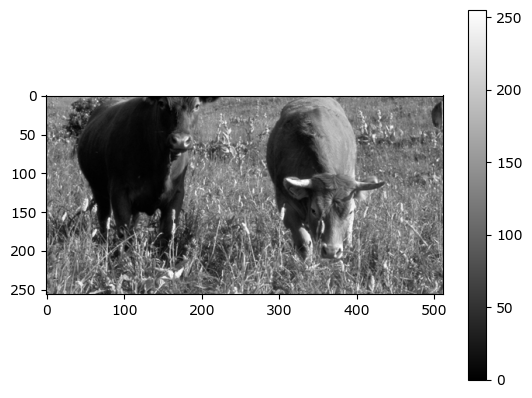

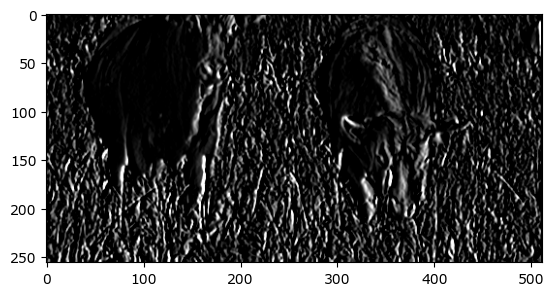

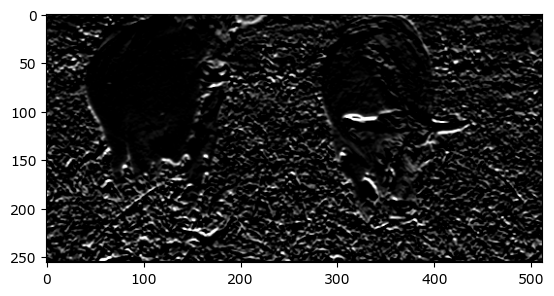

In [7]:
# 4
import cv2

# (a)
img_bgr = cv2.imread('natIMG.jpg')
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
# print(img)
# print(img.shape) => (256, 512)
# print(np.min(img)) => 0
# print(np.max(img)) => 255

# (b)
plt.imshow(img, cmap='gray', vmin=np.min(img), vmax=np.max(img))
plt.colorbar()
plt.show()

# (c)
filter_v = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
img = cv2.GaussianBlur(img, (3,3), 0)
img_v = cv2.filter2D(img, -1, filter_v)

# (d)
plt.imshow(img_v, cmap='gray', vmin=np.min(img_v), vmax=np.max(img_v))
plt.show()

# (e)
filter_h = filter_v.T
img_h = cv2.filter2D(img, -1, filter_h)
plt.imshow(img_h, cmap='gray', vmin=np.min(img_h), vmax=np.max(img_h))
plt.show()

# from scipy import signal ?
# convolve2D ?